# Energy Consumption and CO2 Emission Analysis

This notebook is for data munging and analyzing for trends and correlations in Energy Consumption and CO2 Emission Data.

For final analysis, please refer to `TETC_CO2_Final_Analysis`.

### Library Imports and Paths

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Paths to data
TETC_CA_path = '../Resources/TotalEnergyConsumption_CA.csv'
TETC_US_path = '../Resources/TotalEnergyConsumption_US.csv'
CO2_EMISS_CA_path = '../Resources/TotalCO2Emissions_CA.csv'
CO2_EMISS_US_path = '../Resources/TotalCO2Emissions_US.csv'
CO2_EMISS_NA_path = '../Resources/TotalCO2Emissions_NA.csv'
CO2_EMISS_World_path = '../Resources/TotalCO2Emissions_World.csv'

### Importing Data into Dataframes

In [2]:
# Put Total Energy Total Consumption Data into DataFrames
TETC_CA_df = pd.read_csv(TETC_CA_path)
TETC_US_df = pd.read_csv(TETC_US_path)

# Put CO2 Emission data into DataFrames
CO2_EMISS_CA_df = pd.read_csv(CO2_EMISS_CA_path)
CO2_EMISS_US_df = pd.read_csv(CO2_EMISS_US_path)
CO2_EMISS_NA_df = pd.read_csv(CO2_EMISS_NA_path)
CO2_EMISS_World_df = pd.read_csv(CO2_EMISS_World_path)

# Drop 'Unnamed: 0' column
TETC_CA_df = TETC_CA_df.drop(columns=['Unnamed: 0'])
TETC_US_df = TETC_US_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_CA_df = CO2_EMISS_CA_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_US_df = CO2_EMISS_US_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_NA_df = CO2_EMISS_NA_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_World_df = CO2_EMISS_World_df.drop(columns=['Unnamed: 0'])

### Data Munging

#### Adding columns for averages of US data

In [3]:
# Create a new column for average.
# Take current data and divide by 50 because 50 states.
TETC_US_df['TETCB_US_AVG'] = TETC_US_df.TETCB_US / 50
TETC_US_df['PATCB_US_AVG'] = TETC_US_df.PATCB_US / 50
TETC_US_df['CLTCB_US_AVG'] = TETC_US_df.CLTCB_US / 50
TETC_US_df['NGTCB_US_AVG'] = TETC_US_df.NGTCB_US / 50
CO2_EMISS_US_df['US_ALL_CO2_AVG'] = CO2_EMISS_US_df['US All CO2 Emissions'] / 50
CO2_EMISS_US_df['US_PA_CO2_AVG'] = CO2_EMISS_US_df['US Petroleum CO2 Emissions'] / 50
CO2_EMISS_US_df['US_CL_CO2_AVG'] = CO2_EMISS_US_df['US Coal CO2 Emissions'] / 50
CO2_EMISS_US_df['US_NG_CO2_AVG'] = CO2_EMISS_US_df['US Natural Gas CO2 Emissions'] / 50

### Total Energy Consumption Plots for California and United States

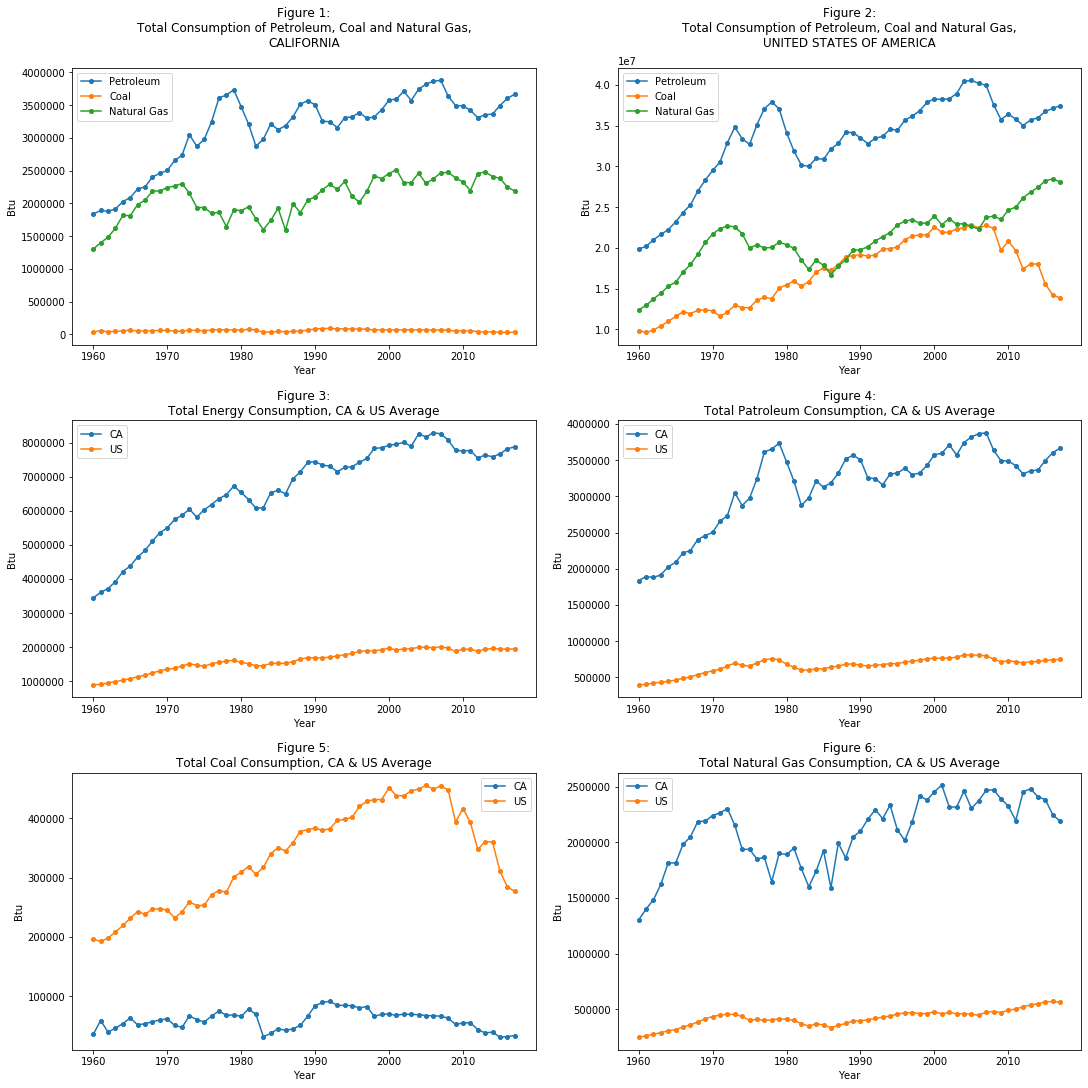

In [4]:
fig, ax = plt.subplots(3,2,
                       figsize=(15,15),
                       constrained_layout=True)

# Total Consumption of P,C,NG, CA, 1960-2017
ax[0,0].set_title("Figure 1:\nTotal Consumption of Petroleum, Coal and Natural Gas,\nCALIFORNIA\n")
ax[0,0].set(xlabel="Year", ylabel="Btu")
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.PATCB_CA, marker='o', markersize=4, label='Petroleum')
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.CLTCB_CA, marker='o', markersize=4, label='Coal')
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.NGTCB_CA, marker='o', markersize=4, label='Natural Gas')
ax[0,0].legend()

# Total Consumption of P,C,NG, USA, 1960-2017
ax[0,1].set_title("Figure 2:\nTotal Consumption of Petroleum, Coal and Natural Gas,\nUNITED STATES OF AMERICA\n")
ax[0,1].set(xlabel="Year", ylabel="Btu")
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.PATCB_US, marker='o', markersize=4, label='Petroleum')
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.CLTCB_US, marker='o', markersize=4, label='Coal')
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.NGTCB_US, marker='o', markersize=4, label='Natural Gas')
ax[0,1].legend()

# Total Energy Consumption, CA & US Average
ax[1,0].set_title("Figure 3:\nTotal Energy Consumption, CA & US Average")
ax[1,0].set(xlabel="Year", ylabel="Btu")
ax[1,0].plot(TETC_CA_df.Year, TETC_CA_df.TETCB_CA, marker='o', markersize=4, label='CA')
ax[1,0].plot(TETC_US_df.Year, TETC_US_df.TETCB_US_AVG, marker='o', markersize=4, label='US')
ax[1,0].legend()

# Total Patroleum Consumption, CA & US Average
ax[1,1].set_title("Figure 4:\nTotal Patroleum Consumption, CA & US Average")
ax[1,1].set(xlabel="Year", ylabel="Btu")
ax[1,1].plot(TETC_CA_df.Year, TETC_CA_df.PATCB_CA, marker='o', markersize=4, label='CA')
ax[1,1].plot(TETC_US_df.Year, TETC_US_df.PATCB_US_AVG, marker='o', markersize=4, label='US')
ax[1,1].legend()

# Total Coal Consumption, CA & US Average
ax[2,0].set_title("Figure 5:\nTotal Coal Consumption, CA & US Average")
ax[2,0].set(xlabel="Year", ylabel="Btu")
ax[2,0].plot(TETC_CA_df.Year, TETC_CA_df.CLTCB_CA, marker='o', markersize=4, label='CA')
ax[2,0].plot(TETC_US_df.Year, TETC_US_df.CLTCB_US_AVG, marker='o', markersize=4, label='US')
ax[2,0].legend()

# Total Natural Gas Consumption, CA & US Average
ax[2,1].set_title("Figure 6:\nTotal Natural Gas Consumption, CA & US Average")
ax[2,1].set(xlabel="Year", ylabel="Btu")
ax[2,1].plot(TETC_CA_df.Year, TETC_CA_df.NGTCB_CA, marker='o', markersize=4, label='CA')
ax[2,1].plot(TETC_US_df.Year, TETC_US_df.NGTCB_US_AVG, marker='o', markersize=4, label='US')
ax[2,1].legend()

plt.show()

### Total CO2 Emission Plots for California and United States

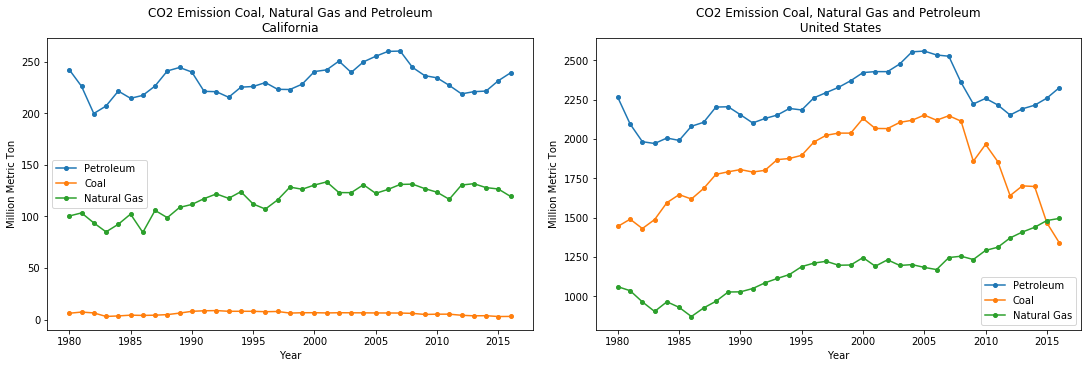

In [5]:
fig, ax = plt.subplots(1,2,
                       figsize=(15,5),
                       constrained_layout=True)

# Total CO2 Emission of P,C,NG, CA, 1980-2016
ax[0].set_title('CO2 Emission Coal, Natural Gas and Petroleum\nCalifornia')
ax[0].set(xlabel='Year', ylabel='Million Metric Ton')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Petroleum CO2 Emissions'], marker='o', markersize=4, label='Petroleum')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Coal CO2 Emissions'], marker='o', markersize=4, label='Coal')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Natural Gas CO2 Emissions'], marker='o', markersize=4, label='Natural Gas')
ax[0].legend()

# Total CO2 Emission of P,C,NG, US, 1980-2016
ax[1].set_title('CO2 Emission Coal, Natural Gas and Petroleum\n United States')
ax[1].set(xlabel='Year', ylabel='Million Metric Ton')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Petroleum CO2 Emissions'], marker='o', markersize=4, label='Petroleum')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Coal CO2 Emissions'], marker='o', markersize=4, label='Coal')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Natural Gas CO2 Emissions'], marker='o', markersize=4, label='Natural Gas')
ax[1].legend(loc='lower right')

plt.show()

### Scatterplot Total Energy Consumption vs. CO2 Emission in California

#### Merge Dataframes since year interval is different

In [6]:
TEC_vs_CO2 = CO2_EMISS_CA_df[['Year','CA All CO2 Emissions']].copy()
TEC_vs_CO2 = TEC_vs_CO2.merge(TETC_CA_df[['Year','TETCB_CA']], how='left')

#### Scatterplot

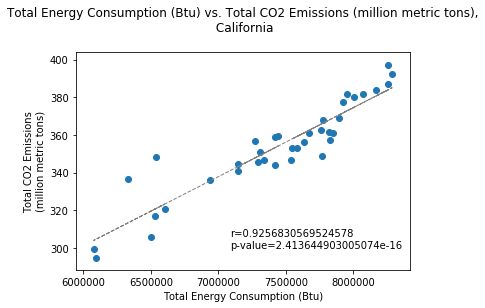

In [7]:
# Line of Best Fit
slope, intercept, r_value, p_value, std_err = stats.linregress(TEC_vs_CO2.TETCB_CA, TEC_vs_CO2['CA All CO2 Emissions'])
line = slope*TEC_vs_CO2.TETCB_CA+intercept
plt.plot(TEC_vs_CO2.TETCB_CA, line, c='grey', linestyle='--', linewidth=1)

# Scatterplot
plt.scatter(TEC_vs_CO2.TETCB_CA, TEC_vs_CO2['CA All CO2 Emissions'])
plt.title("Total Energy Consumption (Btu) vs. Total CO2 Emissions (million metric tons),\n California\n")
plt.xlabel("Total Energy Consumption (Btu)")
plt.ylabel("Total CO2 Emissions\n(million metric tons)")

# Annotate r-value
plt.annotate(f"r={r_value}\np-value={p_value}", (230,60), xycoords='figure points')

plt.show()

### T-Test of Total Energy Consumptions of CA vs US

#### t-test

In [8]:
test, p = stats.ttest_1samp(TETC_CA_df.TETCB_CA, TETC_US_df.TETCB_US_AVG.mean())
p

8.379255747659734e-36

#### Plot with p-value

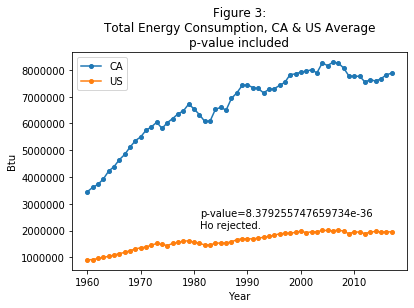

In [9]:
plt.title("Figure 3:\nTotal Energy Consumption, CA & US Average\np-value included")
plt.plot(TETC_CA_df.Year, TETC_CA_df.TETCB_CA, marker='o', markersize=4, label='CA')
plt.plot(TETC_US_df.Year, TETC_US_df.TETCB_US_AVG, marker='o', markersize=4, label='US')
plt.xlabel("Year")
plt.ylabel("Btu")
plt.annotate(f"p-value={p}\nHo rejected.", (200,80), xycoords='figure points')
plt.legend()

plt.show()

### Group Bar Chart of Total Energy Consumption CA vs US

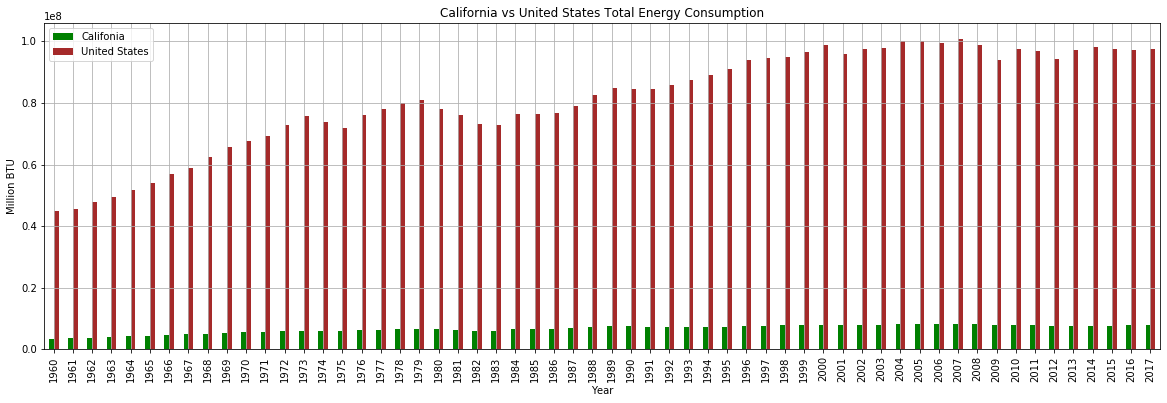

In [10]:
TEC_CAvsUS = TETC_CA_df[['Year','TETCB_CA']]
TEC_CAvsUS = TEC_CAvsUS.merge(TETC_US_df[['Year','TETCB_US']], how ='left')
TEC_CAvsUS = TEC_CAvsUS.set_index('Year')
TEC_CAvsUS = TEC_CAvsUS.sort_values('Year')
ax = TEC_CAvsUS.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('California vs United States Total Energy Consumption')
plt.legend(['Califonia','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')
plt.show()

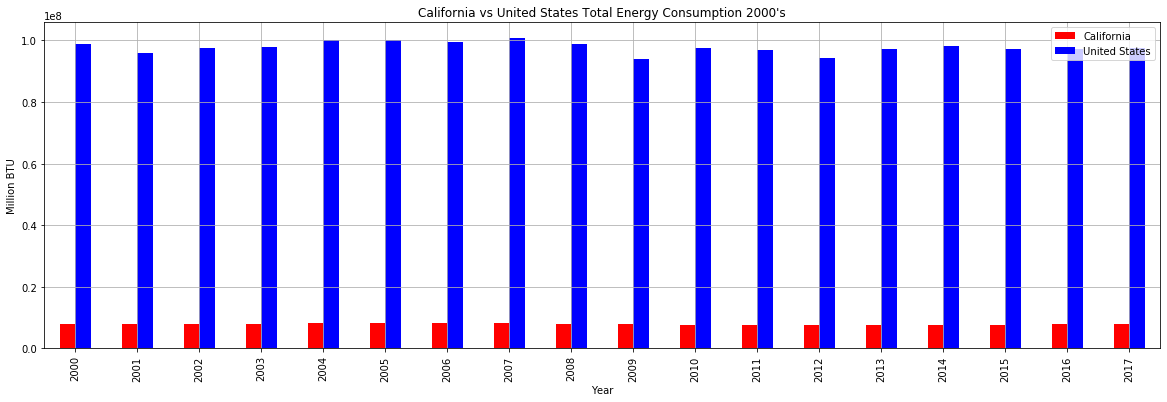

In [11]:
#filter data to only Year 2000s
TEC_CAvsUS_2000s = TEC_CAvsUS.reset_index()
TEC_CAvsUS_filtered = TEC_CAvsUS_2000s[TEC_CAvsUS_2000s['Year'] > 1999]
TEC_CAvsUS_filtered = TEC_CAvsUS_filtered.set_index('Year')
TEC_CAvsUS_filtered = TEC_CAvsUS_filtered.sort_values('Year')
ax = TEC_CAvsUS_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("California vs United States Total Energy Consumption 2000's")
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')
plt.show()

### Group Bar Chart of Total CO2 Emission CA vs US

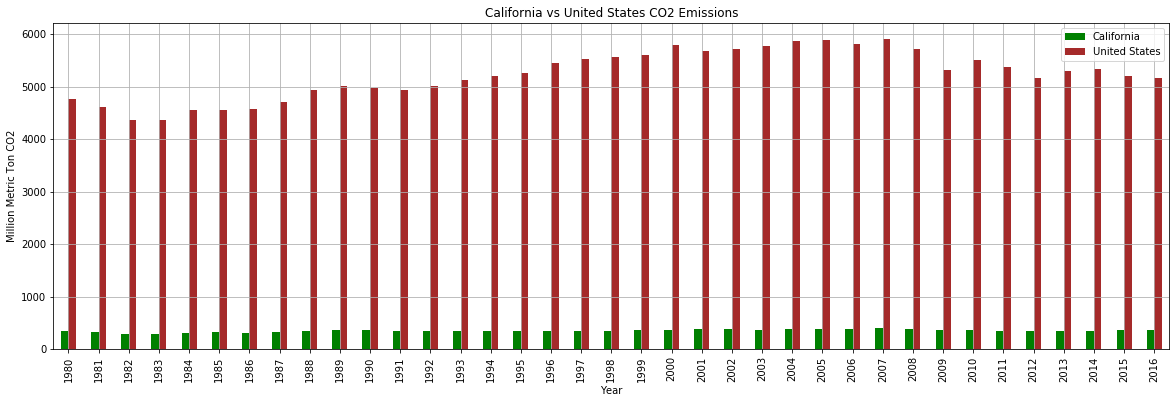

In [12]:
CO2_CAvsUS = CO2_EMISS_CA_df[['Year', 'CA All CO2 Emissions' ]]
CO2_CAvsUS = CO2_CAvsUS.merge(CO2_EMISS_US_df[['Year','US All CO2 Emissions']], how ='left')
CO2_CAvsUS = CO2_CAvsUS.set_index('Year')
CO2_CAvsUS = CO2_CAvsUS.sort_values('Year')
ax = CO2_CAvsUS.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('California vs United States CO2 Emissions')
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')
plt.show()

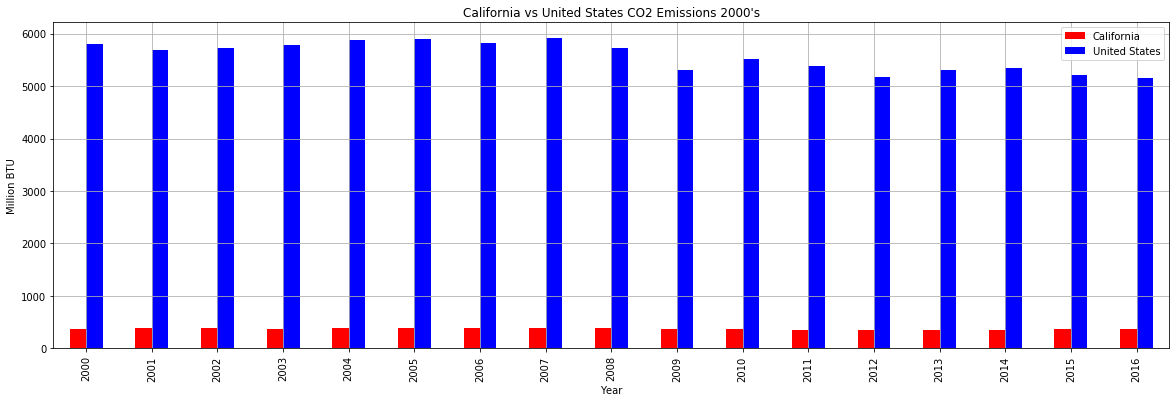

In [13]:
#filter data to only Year 2000s
CO2_CAvsUS_2000s = CO2_CAvsUS.reset_index()
CO2_CAvsUS_filtered = CO2_CAvsUS_2000s[CO2_CAvsUS_2000s['Year'] > 1999]
CO2_CAvsUS_filtered = CO2_CAvsUS_filtered.set_index('Year')
CO2_CAvsUS_filtered = CO2_CAvsUS_filtered.sort_values('Year')
ax = CO2_CAvsUS_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("California vs United States CO2 Emissions 2000's")
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')
plt.show()

### Group Bar Chart of Total CO2 Emission of United States vs. North America

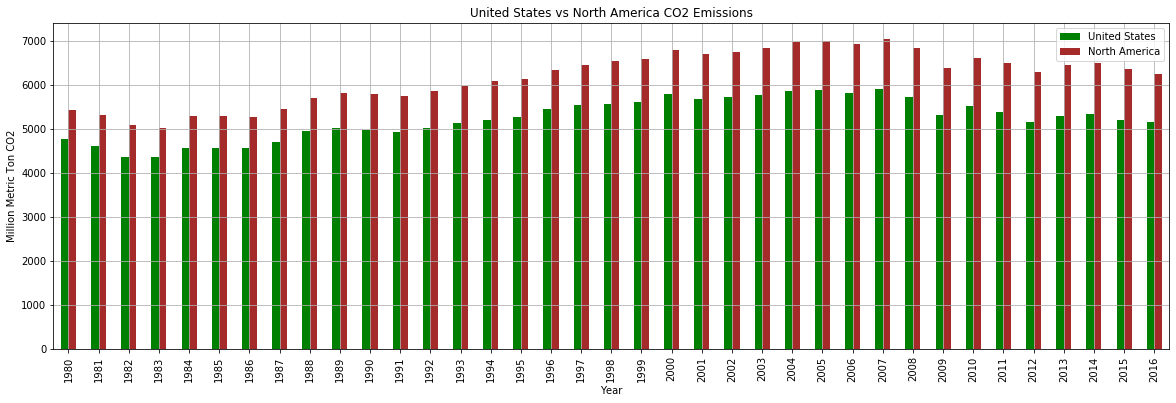

In [14]:
CO2_USvsNA = CO2_EMISS_US_df[['Year', 'US All CO2 Emissions' ]]
CO2_USvsNA = CO2_USvsNA.merge(CO2_EMISS_NA_df[['Year','North America CO2 Emissions']], how ='left')
CO2_USvsNA = CO2_USvsNA.set_index('Year')
CO2_USvsNA = CO2_USvsNA.sort_values('Year')
ax = CO2_USvsNA.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('United States vs North America CO2 Emissions')
plt.legend(['United States','North America'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')
plt.show()

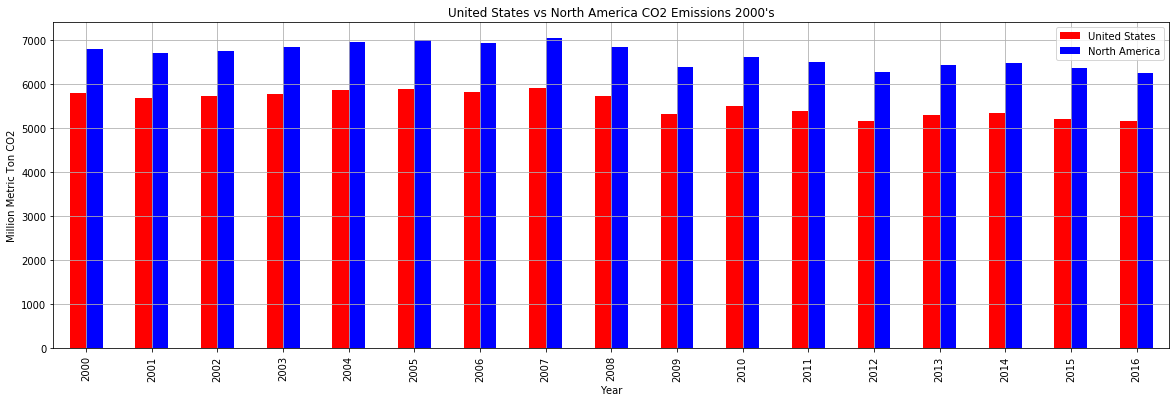

In [15]:
#filter data to only Year 2000s
CO2_USvsNA_2000s = CO2_USvsNA.reset_index()
CO2_USvsNA_filtered = CO2_USvsNA_2000s[CO2_USvsNA_2000s['Year'] > 1999]
CO2_USvsNA_filtered = CO2_USvsNA_filtered.set_index('Year')
CO2_USvsNA_filtered = CO2_USvsNA_filtered.sort_values('Year')
ax = CO2_USvsNA_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("United States vs North America CO2 Emissions 2000's")
plt.legend(['United States','North America'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')
plt.show()

### Group Bar Chart of Total CO2 Emission of United States vs. World

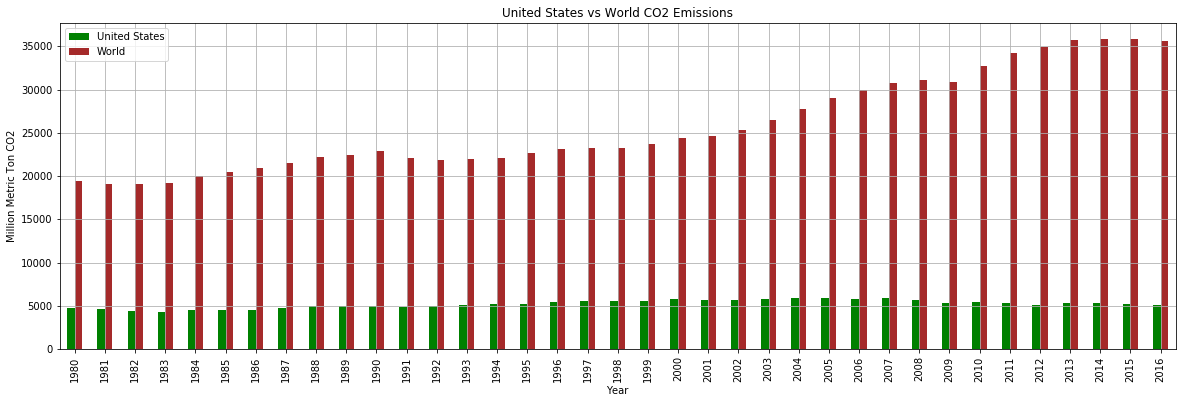

In [16]:
CO2_USvsWorld = CO2_EMISS_US_df[['Year','US All CO2 Emissions']]
CO2_USvsWorld = CO2_USvsWorld.merge(CO2_EMISS_World_df[['Year','World CO2 Emissions']], how ='left')
CO2_USvsWorld = CO2_USvsWorld.set_index('Year')
CO2_USvsWorld = CO2_USvsWorld.sort_values('Year')
ax = CO2_USvsWorld.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('United States vs World CO2 Emissions')
plt.legend(['United States','World'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')
plt.show()

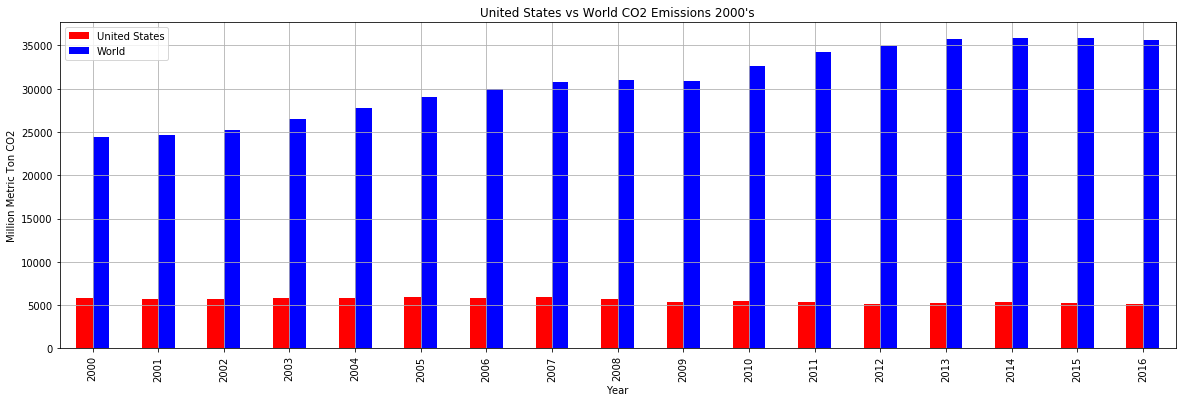

In [17]:
#filter data to only Year 2000s
CO2_USvsWorld_2000s = CO2_USvsWorld.reset_index()
CO2_USvsWorld_filtered = CO2_USvsWorld_2000s[CO2_USvsWorld_2000s['Year'] > 1999]
CO2_USvsWorld_filtered = CO2_USvsWorld_filtered.set_index('Year')
CO2_USvsWorld_filtered = CO2_USvsWorld_filtered.sort_values('Year')
ax = CO2_USvsWorld_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("United States vs World CO2 Emissions 2000's")
plt.legend(['United States','World'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')
plt.show()